### Imports

In [32]:

import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc


### Load Data

In [2]:
file_path = 'health_data.csv'
data = pd.read_csv(file_path)

# Display data
data.head()

,ProviderID,PolicyholderID,Sex,DOB,DOD,DeductiblePaid,ClaimPayment,ClaimStartDate,ClaimEndDate,ClaimDuration,...,Cancer,Depression,Arthritis,Stroke,ReimburseIP,ReimburseOP,DeductibleIP,DeductibleOP,ProbableFraud,ID
0,51001,56354,Female,1934-06-01,NaN,0,100,2023-06-08,2023-06-08,0,...,0,0,0,0,0,320,0,80,0,1
1,51001,106078,Female,1942-12-01,NaN,0,90,2023-06-16,2023-06-16,0,...,0,0,0,0,0,190,0,20,0,2
2,51001,137197,Male,1964-01-01,NaN,0,1500,2023-04-22,2023-04-22,0,...,1,1,1,0,0,2560,0,480,0,3
3,51001,38773,Male,1952-05-01,NaN,1068,12000,2023-05-23,2023-05-25,2,...,0,0,0,0,95000,2270,2136,900,0,4
4,51001,32715,Male,1950-03-01,NaN,0,500,2023-03-29,2023-03-30,1,...,1,1,0,0,2020,6700,1068,2700,0,5


### Data Preprocessing

In [8]:
# Handling missing values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Imputing missing values
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature selection
X = data.drop('ProbableFraud', axis=1)
y = data['ProbableFraud']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Overview of preprocessing steps
preprocessing_overview = {
    "Training Set Size": X_train.shape,
    "Testing Set Size": X_test.shape
}

preprocessing_overview

{'Training Set Size': (77992, 33), 'Testing Set Size': (33426, 33)}

In [18]:
data

,ProviderID,PolicyholderID,Sex,DOB,DOD,DeductiblePaid,ClaimPayment,ClaimStartDate,ClaimEndDate,ClaimDuration,...,Cancer,Depression,Arthritis,Stroke,ReimburseIP,ReimburseOP,DeductibleIP,DeductibleOP,ProbableFraud,ID
0,51001.0,56354.0,0,137,10,0.0,100.0,183,158,0.0,...,0.0,0.0,0.0,0.0,0.0,320.0,0.0,80.0,0.0,1.0
1,51001.0,106078.0,0,239,10,0.0,90.0,191,166,0.0,...,0.0,0.0,0.0,0.0,0.0,190.0,0.0,20.0,0.0,2.0
2,51001.0,137197.0,1,492,10,0.0,1500.0,136,111,0.0,...,1.0,1.0,1.0,0.0,0.0,2560.0,0.0,480.0,0.0,3.0
3,51001.0,38773.0,1,352,10,1068.0,12000.0,167,144,2.0,...,0.0,0.0,0.0,0.0,95000.0,2270.0,2136.0,900.0,0.0,4.0
4,51001.0,32715.0,1,326,10,0.0,500.0,112,88,1.0,...,1.0,1.0,0.0,0.0,2020.0,6700.0,1068.0,2700.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111413,57763.0,89451.0,0,399,10,0.0,40.0,223,218,20.0,...,0.0,1.0,1.0,1.0,32100.0,230.0,2136.0,130.0,0.0,111414.0
111414,57763.0,65211.0,0,272,10,0.0,90.0,156,131,0.0,...,0.0,0.0,0.0,0.0,0.0,2010.0,0.0,530.0,0.0,111415.0
111415,57763.0,36815.0,0,287,10,0.0,1700.0,288,270,7.0,...,0.0,0.0,0.0,0.0,0.0,1800.0,0.0,40.0,0.0,111416.0
111416,57763.0,53546.0,0,266,10,0.0,200.0,203,178,0.0,...,0.0,1.0,1.0,0.0,0.0,6880.0,0.0,1300.0,0.0,111417.0


### Build the Random Forest Model

In [28]:
# Training a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluating the model
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

evaluation_metrics_rf = {
    "Classification Report": report_rf,
    "Confusion Matrix": conf_matrix_rf,
    "ROC AUC Score": roc_auc_rf
}

evaluation_metrics_rf

{'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.84      0.92      0.88     19966\n         1.0       0.86      0.74      0.79     13460\n\n    accuracy                           0.85     33426\n   macro avg       0.85      0.83      0.84     33426\nweighted avg       0.85      0.85      0.84     33426\n',
 'Confusion Matrix': array([[18401,  1565],
        [ 3562,  9898]], dtype=int64),
 'ROC AUC Score': 0.9242242067830317}

In [16]:
print(report_rf)
print(conf_matrix_rf)
print(roc_auc_rf)

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     19966
         1.0       0.86      0.74      0.79     13460

    accuracy                           0.85     33426
   macro avg       0.85      0.83      0.84     33426
weighted avg       0.85      0.85      0.84     33426

[[18401  1565]
 [ 3562  9898]]
0.9242242067830317


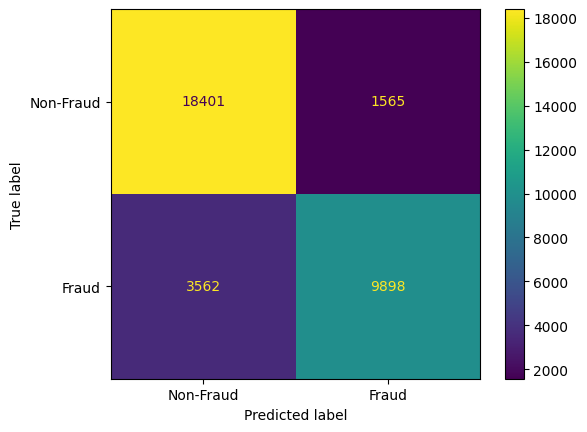

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf,
                              display_labels=["Non-Fraud","Fraud"])
disp.plot()

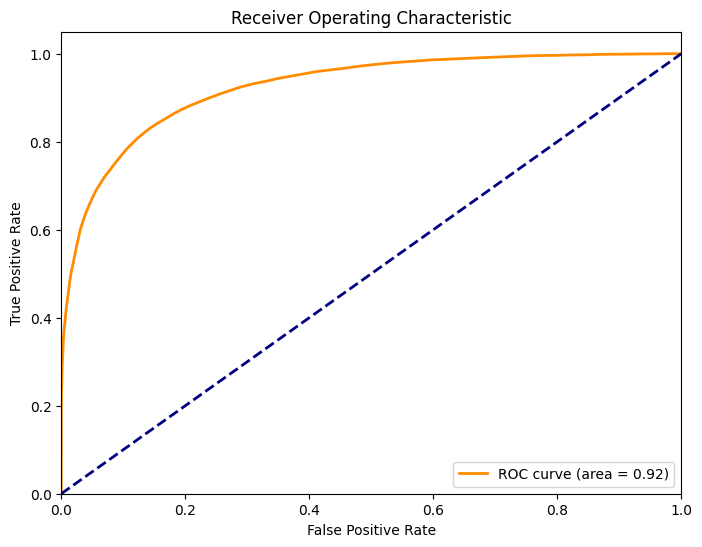

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)


# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()